In [24]:
# Descarga tu repositorio desde GitHub
#!git clone git@github.com:Guesseppe100/Perceptron.git


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
test_data.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key)for(key,value)in word_index.items()])

In [6]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [7]:
decoder_review =" ".join([reverse_word_index.get(i-3,"!")for i in train_data[0]])

In [8]:
decoder_review

"! this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ! is an amazing actor and now the same being director ! father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ! and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ! to the two little boy's that played the ! of norman and paul they were just brilliant children are often left out of the ! list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0].shape

(10000,)

In [12]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [13]:
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [14]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6852 - loss: 0.6203 - val_accuracy: 0.8500 - val_loss: 0.4358
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8834 - loss: 0.3774 - val_accuracy: 0.8806 - val_loss: 0.3318
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9126 - loss: 0.2699 - val_accuracy: 0.8798 - val_loss: 0.3051
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9306 - loss: 0.2151 - val_accuracy: 0.8862 - val_loss: 0.2837
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9414 - loss: 0.1812 - val_accuracy: 0.8916 - val_loss: 0.2744
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9510 - loss: 0.1585 - val_accuracy: 0.8821 - val_loss: 0.2930
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9630 - loss: 0.1301 - val_accuracy: 0.8873 - val_loss: 0.2865
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9667 - loss: 0.1134 - val_accuracy: 0.8805 - v

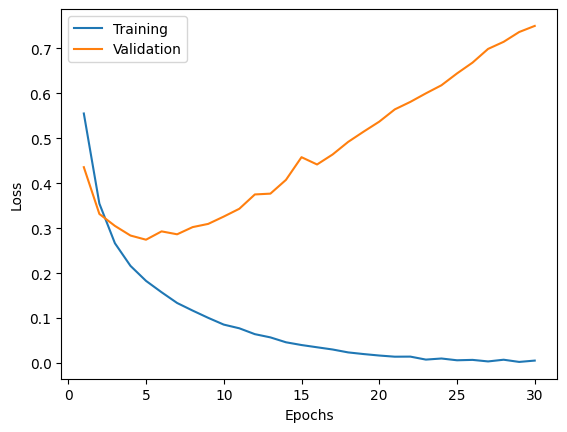

In [17]:
history_model=history.history
loss_train=history_model["loss"]
val_loss_train=history_model["val_loss"]
epochs=range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, label="Training")
plt.plot(epochs, val_loss_train, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

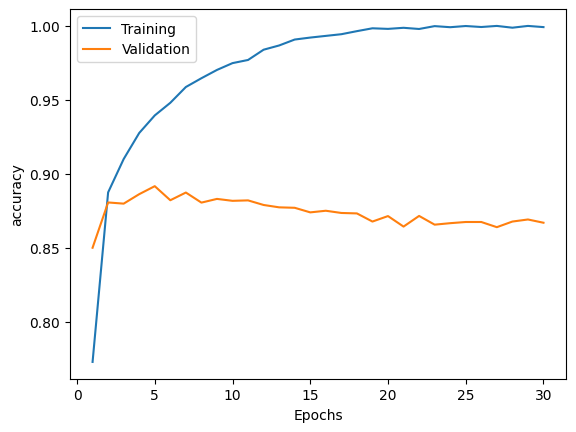

In [18]:
history_model=history.history
loss_train=history_model["accuracy"]
val_loss_train=history_model["val_accuracy"]
epochs=range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, label="Training")
plt.plot(epochs, val_loss_train, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()